- 1. Load Data
- 2. Get to know Data
- 3. Clean Data
    - 3.1 remove weird characters
    - 3.2 stopwords
    - 3.3 popularity based prefiltering
    - 3.4 lemmatization / stemming
- 4. Tokenize Data
- 5. Save preprocessed data

# ---------------------------------------------------------------------- #
# 1. Load Data

Raw data is gathered from [newsapi](https://newsapi.org/) using [this script](https://gist.github.com/davidlenz/961b5cf501b8f89a8c10cbd45306001b)

### Newsapi:

In [20]:
from IPython.display import IFrame    
display(IFrame("https://newsapi.org/", width=1200, height=350))

We use [pandas](https://pandas.pydata.org/) to generally handle the data.

### Pandas:

In [21]:
display(IFrame("https://pandas.pydata.org/", width=1200, height=350))

In [22]:
import pandas as pd
df = pd.read_csv('data/sample_5000.csv')

# 2. Get to know Data

In [23]:
print("Shape:", df.shape)
df.head()

Shape: (5000, 4)


,Index,date,text,title
0,621031,2017-10-26 15:00:54,"eBay launches visual search tools that let you shop using photos from your phone or web0eBay today is launching two new visual search tools that will allow online shoppers to use photos they snap,...",eBay launches visual search tools that let you shop using photos from your phone or web
1,621032,2017-10-26 00:00:00,Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller : The SaltScientists are accusing the seed-and-pesticide giant Monsanto of denying the risks of its latest weedkilling...,Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller
2,621035,2017-10-26 14:41:12,"Hard Drive Stats for Q3 2017In Q3 2017, Backblaze introduced both 10 TB and 12 TB hard drives into our data centers, we continued to retire 3 TB and 4 TB hard drives to increase storage density, a...",2017 Hard Drive Reliability by Drive Size and Brand
3,621036,2017-10-26 15:27:11,"This is part 1 of the “How Unreal Renders a Frame” series, you can access part 2 and part 3 as well.I was looking around the Unreal source the other day and inspired by some excellent breakdowns o...",How Unreal Renders a Frame
4,621423,2017-10-26 16:02:00,"Boeing builds towards its first space taxi testWhen NASA first named Boeing and SpaceX as recipients of the Commercial Crew Program, they originally aimed to end the agency's dependence on Russia ...",Boeing builds towards its first space taxi test


In [24]:
pd.set_option("max.colwidth",200)
df.sample(2)

,Index,date,text,title
3833,3162454,2018-01-23 13:43:00,"Apple's HomePod smart speaker will ship February 9thApple's own vision for the future of home audio, the HomePod smart speaker, will begin shipping on February 9th. Pre-orders for the device open ...",Apple's HomePod smart speaker will ship February 9th
4189,3424385,2018-01-30 13:40:00,"Amazon gets into healthcare with Warren Buffet and JPMorganAmazon just took a surprising turn into the healthcare industry, teaming up with investing hero Warren Buffet and New York-based bank JPM...",Amazon gets into healthcare with Warren Buffet and JPMorgan


### Datatypes

In [25]:
display(IFrame("https://www.tutorialsteacher.com/python/python-data-types", width=1200, height=150))

In [26]:
df.dtypes

Index     int64
date     object
text     object
title    object
dtype: object

### Data distribution

First cast the date column, which is currently of object type, to datetime type.

In [27]:
df["date"] = pd.to_datetime(df.date)
df.dtypes

Index             int64
date     datetime64[ns]
text             object
title            object
dtype: object

Now cast the datetime object to the end/start of a period, for example end of week.

In [28]:
df["week"] = df.date.dt.to_period("W").dt.to_timestamp('W')
print(df.dtypes)
df.head(2)

Index             int64
date     datetime64[ns]
text             object
title            object
week     datetime64[ns]
dtype: object


,Index,date,text,title,week
0,621031,2017-10-26 15:00:54,"eBay launches visual search tools that let you shop using photos from your phone or web0eBay today is launching two new visual search tools that will allow online shoppers to use photos they snap,...",eBay launches visual search tools that let you shop using photos from your phone or web,2017-10-29
1,621032,2017-10-26 00:00:00,Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller : The SaltScientists are accusing the seed-and-pesticide giant Monsanto of denying the risks of its latest weedkilling...,Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller,2017-10-29


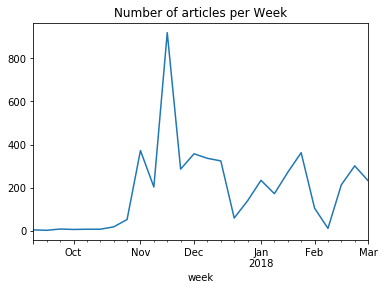

In [29]:
df.groupby("week").title.count().plot(title="Number of articles per Week")

##### Number of words per article

In [30]:
df.text.str.split().apply(len).describe()

count     5000.000000
mean       908.503800
std       1744.611774
min         29.000000
25%        298.000000
50%        568.000000
75%       1086.000000
max      94980.000000
Name: text, dtype: float64

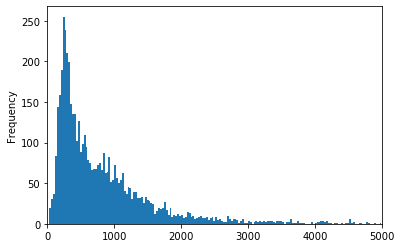

In [31]:
df.text.str.split().apply(len).plot(kind="hist", bins=3330, xlim=(0,5000))

# 3. Clean Data

In [32]:
import re # regular expression library

# get rid of everything except letters, space and .!?
# regex explanation: https://regex101.com/r/xrfp0C/1
# remove everything except lowercase a-z, spaces and .!?
clean = lambda x : re.sub('[^a-z .!?]', "", str(x).lower())

# clean text
%time df["clean_text"] = df.text.apply(clean) 
df.head()

Wall time: 443 ms


,Index,date,text,title,week,clean_text
0,621031,2017-10-26 15:00:54,"eBay launches visual search tools that let you shop using photos from your phone or web0eBay today is launching two new visual search tools that will allow online shoppers to use photos they snap,...",eBay launches visual search tools that let you shop using photos from your phone or web,2017-10-29,ebay launches visual search tools that let you shop using photos from your phone or webebay today is launching two new visual search tools that will allow online shoppers to use photos they snap h...
1,621032,2017-10-26 00:00:00,Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller : The SaltScientists are accusing the seed-and-pesticide giant Monsanto of denying the risks of its latest weedkilling...,Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller,2017-10-29,monsanto attacks scientists after studies show trouble for its new weedkiller the saltscientists are accusing the seedandpesticide giant monsanto of denying the risks of its latest weedkilling te...
2,621035,2017-10-26 14:41:12,"Hard Drive Stats for Q3 2017In Q3 2017, Backblaze introduced both 10 TB and 12 TB hard drives into our data centers, we continued to retire 3 TB and 4 TB hard drives to increase storage density, a...",2017 Hard Drive Reliability by Drive Size and Brand,2017-10-29,hard drive stats for q in q backblaze introduced both tb and tb hard drives into our data centers we continued to retire tb and tb hard drives to increase storage density and we added over p...
3,621036,2017-10-26 15:27:11,"This is part 1 of the “How Unreal Renders a Frame” series, you can access part 2 and part 3 as well.I was looking around the Unreal source the other day and inspired by some excellent breakdowns o...",How Unreal Renders a Frame,2017-10-29,this is part of the how unreal renders a frame series you can access part and part as well.i was looking around the unreal source the other day and inspired by some excellent breakdowns of how ...
4,621423,2017-10-26 16:02:00,"Boeing builds towards its first space taxi testWhen NASA first named Boeing and SpaceX as recipients of the Commercial Crew Program, they originally aimed to end the agency's dependence on Russia ...",Boeing builds towards its first space taxi test,2017-10-29,boeing builds towards its first space taxi testwhen nasa first named boeing and spacex as recipients of the commercial crew program they originally aimed to end the agencys dependence on russia by...


## Lemmatization / Stemming

- Stemming -> Heuristic (fast)
- Lemmatization -> Based on dictionary (not so fast)

<img src="https://timkuhn.github.io/TextMining/images/lemma.png" width="300">

In [ ]:
%%bash

pip3 install -U spacy
python3 -m spacy download en

In [33]:
import spacy
# make sure your downloaded the english model with "python -m spacy download en"
nlp = spacy.load('en')

def lemmatize(text, nlp):
    """Takes a text and a spacy nlp object as input and returns lemmatized tokens for the text using the spacy model"""
    # pass to spacy 
    doc = nlp(text, disable=["ner", "pos"])
    
    # get lemma for each token (i.e. word)
    list_of_lemmatized_words = [token.lemma_ for token in doc]
    
    # join words to string
    lemmatized_text = " ".join(list_of_lemmatized_words)
    
    # return string
    return lemmatized_text
    

# apply the lemmatize function to the first 50 texts
%time df["clean_text"].iloc[:10].apply(lambda text : lemmatize(text, nlp))

Wall time: 972 ms


0    ebay launch visual search tool that let -PRON- shop use photo from -PRON- phone or webebay today be launch two new visual search tool that will allow online shopper to use photo -PRON- snap have s...
1    monsanto attack scientist after study show trouble for -PRON- new weedkiller   the saltscientist be accuse the seedandpesticide giant monsanto of deny the risk of -PRON- late weedkilling technolog...
2    hard drive stat for q in q   backblaze introduce both   tb and   tb hard drive into -PRON- datum center -PRON- continue to retire   tb and   tb hard drive to increase storage density and -PRON- ad...
3    this be part   of the how unreal render a frame series -PRON- can access part   and part   as well.i be look around the unreal source the other day and inspire by some excellent breakdown of how p...
4    boeing build towards -PRON- first space taxi testwhen nasa first name boeing and spacex as recipient of the commercial crew program -PRON- originally aim to end the agencys de

## Popularity based prefiltering

Idea: Very frequent and very infrequent words are either too common or too rare to provide insights.

-> removing corpus-specific stop words

<img src="https://finnaarupnielsen.files.wordpress.com/2013/10/brownzipf.png" width=350>

#### Word frequency for our corpus:

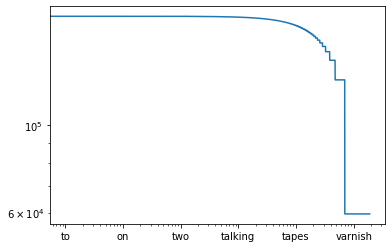

In [34]:
import matplotlib.pyplot as plt
pd.Series([j for k in df["clean_text"].str.split().values for j in k]).value_counts().rank().plot(logy=True, logx=True)

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
stopwords=['of', "the", "to", "a"]
cv = CountVectorizer(min_df=0.005, # min percentage of documents a token needs to appear in 
                     max_df=0.6, # max percentage of docs a token is allowed to appear in
                     stop_words=stopwords) 

%time cv.fit(df["clean_text"].values)
len(cv.vocabulary_)

Wall time: 2.93 s


8372

#### Get the vocabulary from the cv object and filter all words not in the vocab

In [36]:
vocab = frozenset(cv.vocabulary_) # for speed

# split text into list of tokens then
# filter words not in the vocab then
# join words
df["clean_text"] = df["clean_text"].str.split().apply(lambda wordlist : [word for word in wordlist if word in vocab]).apply(" ".join)

df.head()

,Index,date,text,title,week,clean_text
0,621031,2017-10-26 15:00:54,"eBay launches visual search tools that let you shop using photos from your phone or web0eBay today is launching two new visual search tools that will allow online shoppers to use photos they snap,...",eBay launches visual search tools that let you shop using photos from your phone or web,2017-10-29,ebay launches visual search tools let shop using photos your phone today launching two visual search tools allow online shoppers use photos snap saved phone even those find while browsing web soci...
1,621032,2017-10-26 00:00:00,Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller : The SaltScientists are accusing the seed-and-pesticide giant Monsanto of denying the risks of its latest weedkilling...,Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller,2017-10-29,attacks scientists after studies show trouble accusing giant denying risks latest responded attacking some scientific attacks scientists after studies show trouble scott expert university research...
2,621035,2017-10-26 14:41:12,"Hard Drive Stats for Q3 2017In Q3 2017, Backblaze introduced both 10 TB and 12 TB hard drives into our data centers, we continued to retire 3 TB and 4 TB hard drives to increase storage density, a...",2017 Hard Drive Reliability by Drive Size and Brand,2017-10-29,hard drive stats introduced both tb tb hard drives into our data centers continued tb tb hard drives increase storage density added over data storage bring our total storage capacity update well r...
3,621036,2017-10-26 15:27:11,"This is part 1 of the “How Unreal Renders a Frame” series, you can access part 2 and part 3 as well.I was looking around the Unreal source the other day and inspired by some excellent breakdowns o...",How Unreal Renders a Frame,2017-10-29,part how renders frame series access part part looking around source day inspired some excellent how popular games render frame thought try something similar well study how renders frame default a...
4,621423,2017-10-26 16:02:00,"Boeing builds towards its first space taxi testWhen NASA first named Boeing and SpaceX as recipients of the Commercial Crew Program, they originally aimed to end the agency's dependence on Russia ...",Boeing builds towards its first space taxi test,2017-10-29,builds towards first space taxi nasa first named spacex recipients commercial crew program originally aimed end agencys russia developing space technologies hard both companies had push first test...


# Save Data for next steps

In [37]:
df.to_csv("data/sample_5000_clean.csv")

# Summary

- 1. Loaded Data
- 2. Got to know Data
    - 2.1 Distributions
    - 2.2 frequent words and stuff
- 3. Clean Data
    - 3.1 remove weird characters
    - 3.2 stopwords
    - 3.3 popularity based prefiltering
    - 3.4 lemmatization / stemming
- 4. Tokenize Data
- 5. Save preprocessed data

In [47]:
?cv

Type:        CountVectorizer
String form:
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<clas <...>               token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None,
           vocabulary=None)
File:        c:\program files (x86)\anaconda3\envs\py37\lib\site-packages\sklearn\feature_extraction\text.py
Docstring:  
Convert a collection of text documents to a matrix of token counts

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.

Read more in the :ref:`User Guide <text_feature_extraction>`.

Parameters
----------
input : string {'filename', 'file', 'content'}
    If 'filename', the sequence passed as an argument to fit is
    expected to be a list of filenames that need reading to fetch
   